# Matplotlib, seaborn, vpython, bokeh for data visualization

- [Matplotlib](https://matplotlib.org/) : standard for plotting in both 2D and 3D in Python. 
- [Seaborn](https://seaborn.pydata.org/): creates beautiful pictures with almost no effort 
- [Bokeh](https://bokeh.pydata.org/en/latest/): allows to create interactive figures
- [Vpython](https://vpython.org/): allows to easily create full 3D visualizations

[Towards data science - Intro to Pyviz](https://www.google.com/url?q=https%3A%2F%2Ftowardsdatascience.com%2Fpyviz-simplifying-the-data-visualisation-process-in-python-1b6d2cb728f1&sa=D&usd=2&usg=AFQjCNH5IVD3sLerjz8nO6J-2-G5BfW3bw)

# A simple matplotlib example
Let's start plotting by using a simple example with the defaults.

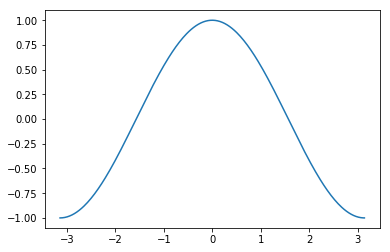

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C= np.cos(X)
plt.plot(X, C)
plt.show() # not necessarily needed

In [3]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The foll

# 2D example

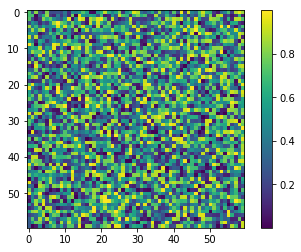

In [3]:
%matplotlib inline
# From http://scipy-lectures.org/intro/numpy/numpy.html
import numpy as np
import matplotlib.pyplot as plt

image = np.random.rand(60, 60)
plt.imshow(image, cmap=plt.cm.viridis) # viridis, heat, magma
plt.colorbar()


# 3D example

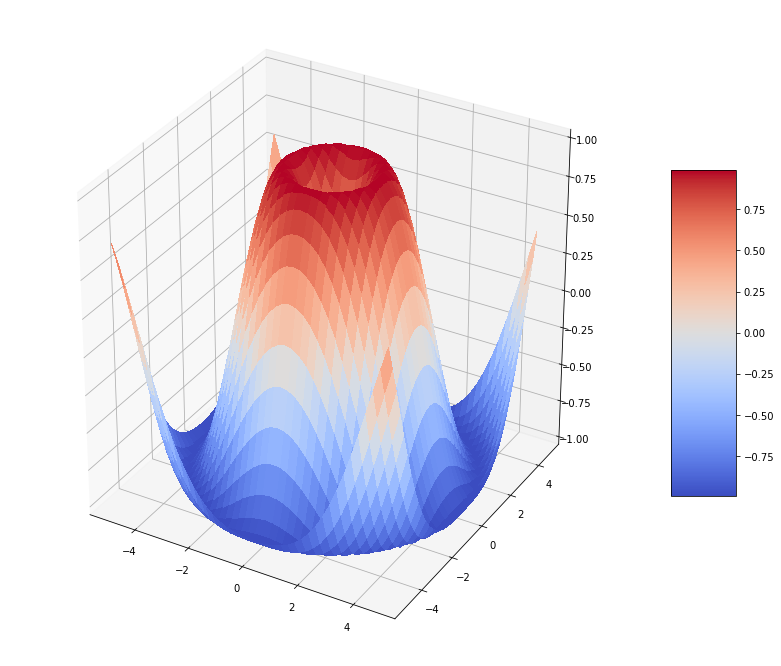

In [4]:
%matplotlib inline
# From: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

fig = plt.figure(figsize=(14,12))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

#plt.show()

# ipyvolume
See: https://ipyvolume.readthedocs.io/en/latest/

```
import numpy as np
import ipyvolume as ipv
V = np.zeros((128,128,128)) # our 3d array
# outer box
V[30:-30,30:-30,30:-30] = 0.75
V[35:-35,35:-35,35:-35] = 0.0
# inner box
V[50:-50,50:-50,50:-50] = 0.25
V[55:-55,55:-55,55:-55] = 0.0
ipv.quickvolshow(V, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)
```

# Vpython : Visual Python
See https://vpython.org/

Install with the following command:
```sh
pip install vpython
```

In [8]:
import vpython as vp
scene = vp.canvas(title='3D box')
vp.box()

<IPython.core.display.Javascript object>

## Creating an sphere

In [9]:
import vpython as vp
#import visual as vp
scene = vp.canvas(title='3D Sphere')
vp.sphere()

<IPython.core.display.Javascript object>

You can also set several properties of the sphere, like color, positions, etc

It is useful to setup the display and visualization for future reference. We will also add arrows for the $x, y, z$ axes.

In [10]:
import vpython as vp
scene = vp.canvas(title="3D scene")
# add ball and wall
ball = vp.sphere(pos=vp.vector(-5,0,0), radius=0.5, color=vp.color.cyan) 
wallR = vp.box(pos=vp.vector(6,0,0), size=vp.vector(0.2,12,12), color=vp.color.green)

<IPython.core.display.Javascript object>

The following shows a complete example of an animation of a particle bouncing against several walls. The integration method is based on the Euler algorithm, and needs to be fixed (is unstable) for more complex situations.

In [11]:
import vpython as vp
vp.scene.autoscale = False
scene = vp.canvas(title='3D animation')
ball = vp.sphere(pos=vp.vector(-5,0,0), radius=0.5, color=vp.color.cyan) 
wallR = vp.box(pos=vp.vector(+6,0,0), size=vp.vector(0.2,12,12), color=vp.color.green) 
wallL = vp.box(pos=vp.vector(-6,0,0), size=vp.vector(0.2,12,12), color=vp.color.green) 
ball.velocity = vp.vector(25,0,0)
deltat = 0.005
vscale = 0.1
varr = vp.arrow(pos=ball.pos, axis=vscale*ball.velocity, color=vp.color.yellow)
t=0
while t < 3:
    vp.rate(100)
    if ball.pos.x > wallR.pos.x or ball.pos.x < wallL.pos.x:
        ball.velocity.x = -ball.velocity.x
    ball.pos = ball.pos + ball.velocity*deltat
    varr.pos = ball.pos; varr.axis=vscale*ball.velocity
    t = t + deltat


<IPython.core.display.Javascript object>

# Improving the simple matplotlib example : $\LaTeX$ labels

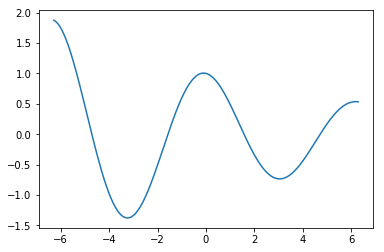

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
X = np.linspace(-2*np.pi, 2*np.pi, 256, endpoint=True)
C= np.exp(-0.1*X)*np.cos(X)
plt.plot(X, C)

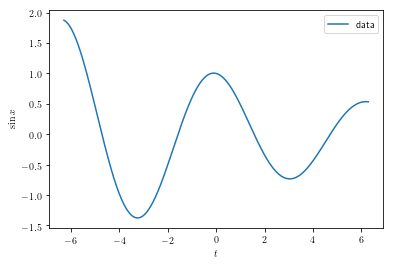

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)

X = np.linspace(-2*np.pi, 2*np.pi, 256, endpoint=True)
C= np.exp(-0.1*X)*np.cos(X)
plt.plot(X, C, '-', label="data")
plt.xlabel(r"$t$")
plt.ylabel(r"$\sin x$")
plt.legend()
plt.savefig("test.pdf")

# Improving matplotlib: Using seaborn
https://seaborn.pydata.org/

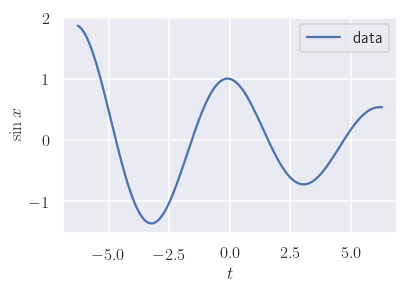

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)

import seaborn as sns
sns.set()
sns.set_context("talk") # paper, poster, talk, notebook

X = np.linspace(-2*np.pi, 2*np.pi, 256, endpoint=True)
C= np.exp(-0.1*X)*np.cos(X)
plt.plot(X, C, '-', label="data")
plt.xlabel(r"$t$")
plt.ylabel(r"$\sin x$")
plt.legend()
plt.savefig("test.pdf", bbox_inches='tight')

#  Interactive plots with bokeh

See : https://bokeh.pydata.org/en/latest/

Install as 
```
conda install bokeh
```

## Simple example of an interactive plot

In [17]:
# Example : https://bokeh.pydata.org/en/latest/docs/user_guide/annotations.html
import numpy as np
from bokeh.plotting import output_file, show, figure

x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x)

output_file("legend.html") 

p = figure()

p.circle(x, y, legend="sin(x)")
p.line(x, y, legend="sin(x)")

show(p)


Session output file 'legend.html' already exists, will be overwritten.


## Adding more lines

In [18]:
# Example : https://bokeh.pydata.org/en/latest/docs/user_guide/annotations.html
import numpy as np
from bokeh.plotting import output_file, show, figure
from bokeh.io import output_notebook

output_notebook()

x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x)

output_file("legend.html")

p = figure()

p.circle(x, y, legend="sin(x)")
p.line(x, y, legend="sin(x)")

p.line(x, 2*y, legend="2*sin(x)",
       line_dash=[4, 4], line_color="orange", line_width=2)

p.square(x, 3*y, legend="3*sin(x)", fill_color=None, line_color="green")
p.line(x, 3*y, legend="3*sin(x)", line_color="green")

show(p)


Loading BokehJS ...

Session output file 'legend.html' already exists, will be overwritten.


## A more interactive plot
Now we add some extra tools to activate/deactivate plots, etc

In [23]:
import numpy as np
from bokeh.plotting import output_file, show, figure
from bokeh.io import output_notebook

#TOOLS=""
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select"
output_notebook()

x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x)

#output_file("legend.html")

#p = figure()
#p = figure(tools=TOOLS)
p = figure(tools=TOOLS,tooltips=[("x", "$x"), ("y", "$y")])

p.circle(x, y, legend="sin(x)")
p.line(x, y, legend="sin(x)")

p.line(x, 2*y, legend="2*sin(x)", line_dash=[4, 4], line_color="orange", line_width=2)

p.square(x, 3*y, legend="3*sin(x)", fill_color=None, line_color="green")
p.line(x, 3*y, legend="3*sin(x)", line_color="green")

p.legend.location = "top_right"
p.legend.click_policy="hide"

show(p)


Loading BokehJS ...

## Other bokeh examples
- 2D tile : https://bokeh.pydata.org/en/latest/docs/gallery/hex_tile.html
- Tooltips : https://bokeh.pydata.org/en/latest/docs/gallery/image.html

# Where to go from here
[Towards data science - Intro to Pyviz](https://www.google.com/url?q=https%3A%2F%2Ftowardsdatascience.com%2Fpyviz-simplifying-the-data-visualisation-process-in-python-1b6d2cb728f1&sa=D&usd=2&usg=AFQjCNH5IVD3sLerjz8nO6J-2-G5BfW3bw)

[Pyviz web page](http://pyviz.org/)

In [ ]:
!pip install vpython